## 2 этап соревнования по пратике от Wildberries & Russ

`Черкасов Б. Ю.`

В современном цифровом мире обеспечение уважительной и безопасной среды общения становится одной из ключевых задач. В этом соревновании вам предстоит разработать систему, которая сможет автоматически находить конкретные нецензурные выражения в пользовательских текстах. Задача заключается не в замене или сокрытии этих слов, а в точном их выявлении и представлении в требуемом формате.

Задача

Вы будете работать с реальными данными — отзывами и комментариями пользователей, содержащими как явные, так и завуалированные формы мата. Цель — найти все вхождения нецензурной лексики в тексте, привести их к нижнему регистру, отсортировать по алфавиту и представить в виде строки.

Это соревнование отражает реальные вызовы, стоящие перед системами модерации контента, и ваше решение может стать важным шагом в создании более чистой и безопасной онлайн-среды.

Сможет ли ваша модель точно находить и выделять все нецензурные выражения, включая сложные и завуалированные формы? Покажите, на что способны ваши алгоритмы!

***Data***
___
В этом разделе описаны файлы данных, их структура и формат. Вы найдете всю необходимую информацию для успешного участия в соревновании.
Файлы данных:

train.csv — тренировочный набор данных. Этот файл содержит тексты и метки, представляющие собой нецензурные слова, если они присутствуют в тексте.


test.csv — тестовый набор данных. Этот файл содержит тексты, для которых вам необходимо выделить и указать найденные маты. Метки для тестовых данных отсутствуют.


sample_submission.csv — пример файла для сабмита. Показывает правильный формат предсказания для тестового набора.

Структура колонок:
id — уникальный идентификатор текста.

text — текст сообщения, который может содержать или не содержать нецензурную лексику.

label (только в train.csv) — строка, содержащая все нецензурные слова, присутствующие в тексте:

Слова приведены к нижнему регистру.
Отсортированы по алфавиту.
Разделены запятыми.
Если мата нет, значение будет пустым.

___
Пример данных:
train.csv:

id text label

0 Брюки отличные, качественные, но к сожалению коротковаты, поэтому отказ, обидно…

1 Отличный аппарат, в комплекте кабель и работает от сети, а значит можно сразу…

2 Супер 👍 спасибо большое

3 Спасибо за уёбищние шарики! Такой хуйни я еще не видела! хуйни,уёбищние

4 Говно а не товар говно

test.csv:

id text

10 Продавец отправил быстро, качество не понравилось

11 Это полное г…!

12 Не понимаю, как можно такое продавать! Ужасно!

Что вы должны предсказать?

Вам нужно предсказать все нецензурные слова в текстах из тестового набора данных. Формат предсказания для каждого текста:

Строка с нецензурными словами, приведенными к нижнему регистру, отсортированными по алфавиту и разделенными запятыми.
Если мата нет, строка должна быть пустой.
Пример:

sample_submission.csv:

id label

10

11 г…

12

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Соберем в список плохие слова.

In [4]:
from collections import Counter

train = pd.read_csv("train.csv")
all_bad_words = Counter()
for labels in train["label"].dropna():
    for word in labels.split(","):
        all_bad_words[word.strip()] += 1

bad_words_list = set(all_bad_words.keys())
bad_words_list

{'',
 'запиздил',
 'такое ггггг',
 'г....поставил',
 'жопашники',
 'говнястого',
 'г…..',
 'заебётись',
 'рукожопностью',
 'херакс',
 'похеру',
 'всрат',
 'полная г..',
 'рукожопства',
 'хуйтень',
 'ах"ител"ная',
 'хераборы',
 'уеб**л',
 'хулиганистого',
 'нахуярили',
 'з@€бись',
 'ебанных',
 'х...ета',
 'г...пьяному',
 'обосрано',
 'дристотная',
 'пи@дц',
 'пи……ас',
 'херь',
 'муди',
 'поебен',
 'целом - г.....но',
 'дристунизм',
 'обманд',
 'ахуеннфй',
 'суки',
 'хуйэню',
 'шлюшие',
 'г.....темнеет',
 'хуевым',
 'ахуетдд',
 'рукожопная',
 'минжа',
 'засрала',
 'рукажопый',
 'з@ебца',
 'чмотрися',
 'нахерачила',
 'гавномистикой',
 'шалавы',
 'го.но',
 'г....всё',
 'х... во',
 'это г....',
 'хуйнч',
 'чмоне',
 'нухуя',
 'такое г---о',
 'нахх',
 'херабуной',
 'педера',
 'хуярить',
 'сукии',
 'херабуна',
 'ху…',
 'дерьмоооо',
 'в ахере',
 'г.. но',
 'заебandлась',
 'простите',
 'хуёвые',
 'жопендры',
 'го...полное',
 'ебну',
 'хуйня ебана',
 'г....скрипели',
 'х.....ня',
 'дерьмоо',
 'еь

In [6]:
import re

# Поиск известных матов в тексте
def extract_bad_words(text, bad_words):
    text = text.lower()
    tokens = re.findall(r'\b\w+\b', text)
    found = [word for word in tokens if word in bad_words]
    return ",".join(sorted(set(found)))

In [8]:
# Загружаем данные
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

train

,ID,text,label
0,0,"брюки отличные, качественные, но к сожалению к...",NaN
1,1,"отличный аппарат, в комплекте кабель и работет...",NaN
2,2,супер 👍 спасибо большое,NaN
3,3,получил быстро данные наушники! к наушникам пр...,NaN
4,4,всё дошло в целости и сохранности),NaN
...,...,...,...
244734,248088,мне ее порвали суки,суки
244735,248089,"Полное дерьмо, удалите этот товар и заблокируй...",дерьмо
244736,248090,Херня. Деньги на ветер.,херня
244737,248091,"Это вообще что , за 💩 гов... ще?? Темнотища уж...",гов... ще


In [10]:
# Применяем baseline-функцию
test["label"] = test["text"].apply(lambda x: extract_bad_words(x, bad_words_list))

# Сохраняем в формате submission
submission = test[["ID", "label"]]
submission.to_csv("baseline.csv", index=False)

#### Реализация базовых гипотез.

Попробуем "тупо" пробить нужый скор, воспользуемся регулярными выражениями, эмбеддингами, трансформерами, базовыми моделями и TF-IDF преобразованием.

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244739 entries, 0 to 244738
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      244739 non-null  int64 
 1   text    244739 non-null  object
 2   label   34851 non-null   object
dtypes: int64(1), object(2)
memory usage: 5.6+ MB


In [12]:
train.isna().sum()

ID            0
text          0
label    209888
dtype: int64

In [15]:
train['label'].value_counts()

label
говно                  5146
херня                  2317
гавно                  2292
дерьмо                 1884
хуйня                   977
                       ... 
задолбал,говно,говн       1
задолбалься               1
хуёва,хуйню               1
дерьмищеее                1
там г...                  1
Name: count, Length: 4883, dtype: int64

In [26]:
# Загрузка
train = pd.read_csv("train.csv")

# Заменим NaN на пустые строки
train["label"] = train["label"].fillna("")

# Преобразуем строки в списки слов
train["label_list"] = train["label"].apply(lambda x: [word.strip() for word in x.split(",") if word.strip()])

# Составим множество всех уникальных слов-мата
bad_words_set = set()
for words in train["label_list"]:
    bad_words_set.update(words)

print(f"Всего уникальных слов мата: {len(bad_words_set)}")

Всего уникальных слов мата: 3648


In [33]:
def clean_token(word):
    # Приведение к нижнему регистру и замена замаскированных символов
    word = word.lower()
    word = word.replace("ё", "е")
    word = word.replace("*", "и")
    word = word.replace("@", "а")
    word = word.replace("…", "")
    word = re.sub(r"[^\w]", "", word)  # убрать все кроме букв и цифр
    return word

def extract_bad_words(text, bad_words):
    text = text.lower()
    text = text.replace("ё", "е")  # нормализуем
    raw_tokens = re.findall(r"\b\w+\b", text)
    cleaned = [clean_token(t) for t in raw_tokens]
    
    found = sorted(set([w for w in cleaned if w in bad_words]))
    return ",".join(found)

In [34]:
# Список паттернов (регулярных выражений) для замаскированных матов
custom_patterns = [
    r"\bх\W*у\W*й\w*\b",         # х*й, х у й, хуйня и пр.
    r"\bг\W*о\W*в\W*н\W*о\w*\b", # г@вно, г…вно, говнище
    r"\bп\W*и\W*д\W*(а|о|е)?\w*\b", # пид@р, пидрило, пидор
    r"\bёп\W*(т|н|ч)\w*\b",       # ёпт, ёпн, ёпта, ёпть
    r"\bу\W*ё\W*б\w*\b",          # уёбищное, уебан, уеб*
    r"\bм\W*а\W*н\W*д\w*\b",      # манда, м@нда, мандец
    r"\bп\W*о\W*х\w*\b",          # пох, поху*
    r"\bс\W*у\W*к\w*\b",          # сука, с*ка
    r"\bд\W*о\W*л\W*б\w*\b",      # долба*
]

def regex_mats(text):
    text = text.lower().replace("ё", "е")
    found = []
    for pattern in custom_patterns:
        matches = re.findall(pattern, text)
        found.extend(matches)
    return found

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Обработка данных
train = pd.read_csv("train.csv")
train["label"] = train["label"].fillna("")
train["has_mats"] = train["label"].apply(lambda x: int(len(x.strip()) > 0))

# Тексты и таргеты
X = train["text"]
y = train["has_mats"]

# Векторизация
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_vec = vectorizer.fit_transform(X)

# Разделение и обучение
X_train, X_val, y_train, y_val = train_test_split(X_vec, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Проверка
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     41981
           1       0.94      0.69      0.79      6967

    accuracy                           0.95     48948
   macro avg       0.95      0.84      0.88     48948
weighted avg       0.95      0.95      0.95     48948



In [36]:
test = pd.read_csv("test.csv")
test_vec = vectorizer.transform(test["text"])
test["has_mats_pred"] = model.predict(test_vec)

# Функция для извлечения мата с помощью словаря + regex
def extract_all(text, bad_words_set):
    text = text.lower().replace("ё", "е")
    tokens = re.findall(r"\b\w+\b", text)
    norm_tokens = [clean_token(t) for t in tokens]

    found_from_dict = set([w for w in norm_tokens if w in bad_words_set])
    found_from_regex = set([clean_token(w) for w in regex_mats(text)])

    total = found_from_dict.union(found_from_regex)
    return ",".join(sorted(total))

# Применяем, но только если модель считает, что текст содержит мат
test["label"] = test['text'].apply(lambda x: extract_all(x, bad_words_set))

# Сохраняем финальное предсказание
submission = test[["ID", "label"]]
submission.to_csv("baseline1.csv", index=False)
print("Финальный файл submission.csv сохранён!")

Финальный файл submission.csv сохранён!


In [37]:
import numpy as np
import Levenshtein as lev

def avg_levenshtein(y_true, y_pred):
    return np.mean([lev.distance(a, b) for a, b in zip(y_true, y_pred)])

# Например, на валидационной части train
train_pred = train["text"].apply(lambda x: extract_all(x, bad_words_set))
print("Левенштейн:", avg_levenshtein(train["label"], train_pred))

Левенштейн: 0.4791512590964252


In [39]:
# Загрузка данных
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# 🔹 Построим исходный словарь мата из train
bad_words_set = set()

for label in train["label"].dropna():
    for word in label.split(","):
        bad_words_set.add(word.strip().lower())

# 🔹 Добавим вручную дополнительные слова
extra_bad_words = {
    "говно", "хуй", "пизда", "уёбищние", "мудак", "гандон", "сук", "еб", "бляд", "пидор", "жопа",
    "гавно", "хуесос", "уебище", "уебан", "пидар", "еблан", "гнида", "мразь",
    "даун", "тварь", "дебил", "дурак", "идиот", "чмо", "конч", "ебло", "ублюдок"
}

bad_words_set.update(extra_bad_words)

# 🔹 Базовая функция для извлечения мата
def extract_bad_words(text, bad_words):
    text = text.lower()
    words = re.findall(r'\w+', text)  # \w+ находит слова из букв/цифр/_
    found = set(
        word for word in words 
        if word in bad_words and len(word) >= 3 and not word.isdigit()
    )
    return ','.join(sorted(found))

# 🔹 Применим к тесту
test["label"] = test["text"].apply(lambda x: extract_bad_words(x, bad_words_set))

# 🔹 Сохраним сабмит
test[["ID", "label"]].to_csv("submission.csv", index=False)

In [41]:
# 🔹 Загрузка данных
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# 🔹 Формирование словаря мата из train
bad_words_set = set()
for label in train["label"].dropna():
    for word in label.split(","):
        bad_words_set.add(word.strip().lower())

# 🔹 Добавим вручную дополнительные слова
extra_bad_words = {
    "говно", "гавно", "хуй", "пизда", "уёбищние", "мудак", "гандон", "сук",
    "еб", "бляд", "пидор", "жопа", "хуесос", "уебище", "уебан", "пидар", "еблан",
    "гнида", "мразь", "даун", "тварь", "дебил", "дурак", "идиот", "чмо", "конч",
    "ебло", "ублюдок", "шалава", "проститутка", "дрянь"
}
bad_words_set.update(extra_bad_words)

# 🔹 Расширенная функция извлечения
def extract_bad_words(text, bad_words):
    text = text.lower()
    
    # --- 1. Словарные совпадения ---
    words = re.findall(r'\w+', text)
    found = set(
        word for word in words 
        if word in bad_words and len(word) >= 3 and not word.isdigit()
    )

    # --- 2. Регулярные выражения для завуалированных/искажённых матов ---
    pattern_matches = []

    regex_patterns = [
        r"\bг\.*[ао]*в*н*[оа]*\b",         # г...но, гавно
        r"\bх+у+[ийеёя]*\b",              # хуй, хyй, х*й
        r"\bп+и+[зз]+д+[а-я]*\b",         # пизда, п*зда
        r"\bе+б+[а-яё]*\b",               # ебать, ебло
        r"\bу+ё+б+[а-я]*\b",              # уёбок, уебище
        r"\bп+и+д+[а-яё]*\b",             # пидор, п*дорас
        r"\bм+у+д+[а-я]*\b",              # мудак
        r"\bс+у+к+[а-я]*\b",              # сука, с*ка
        r"\bб+л+я+[дт]+[а-я]*\b",         # блядь
        r"\bж+о+п+[а-я]*\b",              # жопа
        r"\bу+\W*е+б+[а-я]*\b",           # у*ебище
    ]

    for pattern in regex_patterns:
        matches = re.findall(pattern, text)
        pattern_matches.extend(matches)

    # --- 3. Объединяем ---
    all_bad = set(found) | set(pattern_matches)
    all_bad_cleaned = [
        w.strip() for w in all_bad 
        if len(w.strip()) >= 3 and not w.isdigit()
    ]

    return ','.join(sorted(set(all_bad_cleaned)))

# 🔹 Применяем к тестовому набору
test["label"] = test["text"].apply(lambda x: extract_bad_words(x, bad_words_set))

# 🔹 Сохраняем результат
test[["ID", "label"]].to_csv("submission.csv", index=False)

In [43]:
import pandas as pd
import re

# Загрузка
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Словарь только из train
bad_words = set()
for label in train["label"].dropna():
    for word in label.split(","):
        bad_words.add(word.strip().lower())

# Упрощённый extract_bad_words
def extract_bad_words(text, bad_words):
    text = text.lower()
    
    # 1. Словарные совпадения
    tokens = re.findall(r'\w+', text)
    found = set([t for t in tokens if t in bad_words])

    # 2. Лёгкие паттерны (только надёжные)
    patterns = [
        r"\bуёбищ\w*",    # уёбищние
        r"\bхуй\w*",      # хуйни, хую
        r"\bговно\w*",    # говно
    ]
    
    for pat in patterns:
        found.update(re.findall(pat, text))

    return ",".join(sorted(set(found)))

# Применяем
test["label"] = test["text"].apply(lambda x: extract_bad_words(x, bad_words))
test[["ID", "label"]].to_csv("submission.csv", index=False)

In [45]:
import pandas as pd
from Levenshtein import distance as levenshtein_distance

# Загрузим данные
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("submission.csv")

# Объединяем test и submission по ID
merged = test.merge(submission, on="ID", how="left")
merged = merged.merge(train[['ID', 'label']], on="ID", how="left")

# Переименуем колонки для ясности
merged.rename(columns={'label': 'true_label', 'label_x': 'true_label', 'label_y': 'predicted_label'}, inplace=True)

# Заполним пропущенные значения пустыми строками
merged['true_label'] = merged['true_label'].fillna("")
merged['predicted_label'] = merged['predicted_label'].fillna("")

# Расчёт расстояния Левенштейна
merged['levenshtein'] = merged.apply(lambda row: levenshtein_distance(row['true_label'], row['predicted_label']), axis=1)

# Отсортируем по убыванию ошибки
errors = merged.sort_values(by='levenshtein', ascending=False)

# Покажем топ-20 самых плохих предсказаний
print(errors[['ID', 'text', 'true_label', 'predicted_label', 'levenshtein']].head(20))

# Средняя ошибка
print("Среднее расстояние Левенштейна:", errors['levenshtein'].mean())


          ID                                               text  \
56509  56509  говнище полное. клавиатуру с мышью подключаешь...   
37184  37184  блять это пиздец! за ноги спасибо, что сделали...   
65010  70061  : 2024-11-14 17:46:54;\nTaskTitle: proba-text-...   
21445  21445                               очень даже интересно   
65172  70223  : 2024-11-14 17:46:54;\nTaskTitle: proba-text-...   
61757  66808  Часы на столько дерьмовые что даже нормально и...   
65052  70103  Часы на столько дерьмовые что даже нормально и...   
54183  54183                беру не в первый раз! всё отлично 👌   
29307  29307  здравствуйте, я у вас заказала очки, вместо оч...   
38874  38874  хорошие пакеты,пришли в отличном состоянии,пла...   
38170  38170  наушники классные заказываю второй раз, звук т...   
46679  46679                          не оригинал,хрень жуткая.   
6793    6793  обожаю его, это вторая баночка про запас 💣 для...   
66452  71503  : 2024-11-22 14:07:48;\nTaskTitle: proba-text-..

In [47]:
CUSTOM_PATTERNS = [
    r"\bп[иеё]зд\w*", r"\bх[ую@*ееё]+\w*", r"\bг[оа]вн\w*", r"\b[её]бан\w*",
    r"\bпид[оа]р\w*", r"\bсука\w*", r"\bбл[яа]д\w*", r"\bшлюх\w*", r"\bдолба[её]б\w*",
    r"\bнах[уяе]\w*", r"\bебат\w*", r"\bу[её]б\w*"
]

def extract_bad_words(text):
    bad_words = set()
    lowered_text = text.lower()
    for pattern in CUSTOM_PATTERNS:
        matches = re.findall(pattern, lowered_text, flags=re.IGNORECASE)
        bad_words.update(matches)
    return ",".join(sorted(bad_words))


In [48]:
# Если предсказано > 3 слова, но в тексте нет грубости — убираем
def post_filter(predicted, text):
    predicted_set = set(predicted.split(","))
    actual_matches = extract_bad_words(text).split(",")
    if len(predicted_set) > 3 and len(actual_matches) == 0:
        return ""
    return predicted


In [52]:
train

,ID,text,label
0,0,"брюки отличные, качественные, но к сожалению к...",NaN
1,1,"отличный аппарат, в комплекте кабель и работет...",NaN
2,2,супер 👍 спасибо большое,NaN
3,3,получил быстро данные наушники! к наушникам пр...,NaN
4,4,всё дошло в целости и сохранности),NaN
...,...,...,...
244734,248088,мне ее порвали суки,суки
244735,248089,"Полное дерьмо, удалите этот товар и заблокируй...",дерьмо
244736,248090,Херня. Деньги на ветер.,херня
244737,248091,"Это вообще что , за 💩 гов... ще?? Темнотища уж...",гов... ще


Среднее расстояние Левенштейна: 1.7523
                                                     text  \
78775        одним словом г не держиться нажом срезаеться   
112514  качество просто капец ужас не та фирма которую...   
34015   ужас это что за наклейки просто картинка на бу...   
172046  отвратительное качество заказывала чтобы надет...   
139599                               полное г не ведитесь   
70489   футболка полное г не стоит этих денег цвет гря...   
77220                                       говно ебанное   
82055   говно ебанное после первой же стирки джинсы по...   
208765                                       говно ебаное   
154556                                 эээ маломерит ху я   
171076  выглядит ужасно выслали не то что надо и цвет ...   
139949  конструкция липкая мыть еще можно но сгонять в...   
89116   пришло полное г о на картинке рекламы все крас...   
85510   наушники прослужили ровно неделю не советую по...   
36499   деньги выкинула на ветер я так понимаю

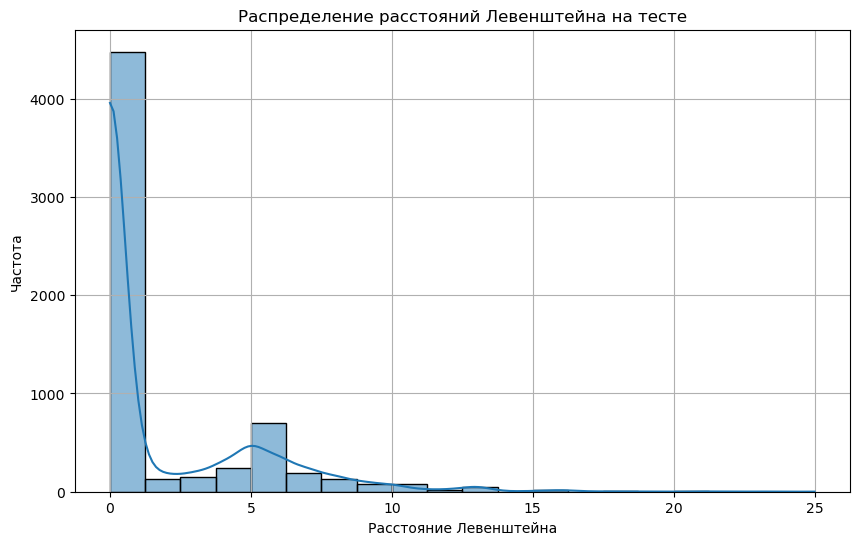

In [56]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import Levenshtein
import matplotlib.pyplot as plt
import seaborn as sns

# === Загрузка данных ===
df = pd.read_csv("train.csv")  # Замените на путь к вашему датасету
df = df.dropna(subset=["label", "text"])

# === Очистка текста ===
def clean_text(text):
    text = re.sub(r"[^\w\s]", " ", text.lower())
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["text_clean"] = df["text"].apply(clean_text)

# Оставим только классы с хотя бы 2 наблюдениями
label_counts = df["label"].value_counts()
valid_labels = label_counts[label_counts >= 2].index
df = df[df["label"].isin(valid_labels)]


# === Обучающая и тестовая выборки ===
X_train, X_test, y_train, y_test = train_test_split(
    df["text_clean"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)

# === Векторизация + Модель ===
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(analyzer='char_wb', ngram_range=(3, 5), max_features=50000)),
    ("clf", LogisticRegression(C=1.0, penalty='l2', solver="liblinear"))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# === Оценка по Левенштейну ===
def levenshtein_score(y_true, y_pred):
    scores = []
    for true, pred in zip(y_true, y_pred):
        scores.append(Levenshtein.distance(str(true), str(pred)))
    return np.mean(scores)

lev_score = levenshtein_score(y_test, y_pred)
print(f"Среднее расстояние Левенштейна: {lev_score:.4f}")

# === Анализ ошибок ===
errors_df = pd.DataFrame({
    "text": X_test,
    "true_label": y_test,
    "predicted_label": y_pred
})
errors_df["levenshtein"] = [
    Levenshtein.distance(str(t), str(p)) for t, p in zip(errors_df["true_label"], errors_df["predicted_label"])
]
errors_df["len_true"] = errors_df["true_label"].apply(lambda x: len(str(x).split(",")))
errors_df["len_pred"] = errors_df["predicted_label"].apply(lambda x: len(str(x).split(",")))

# Топ-20 самых плохих предсказаний
worst_errors = errors_df.sort_values(by="levenshtein", ascending=False).head(20)
print(worst_errors[["text", "true_label", "predicted_label", "levenshtein"]])

# === Визуализация ===
plt.figure(figsize=(10, 6))
sns.histplot(errors_df["levenshtein"], bins=20, kde=True)
plt.title("Распределение расстояний Левенштейна на тесте")
plt.xlabel("Расстояние Левенштейна")
plt.ylabel("Частота")
plt.grid(True)
plt.show()

In [57]:
# === Предсказание на test.csv ===
test_df = pd.read_csv("test.csv")  # Замените путь, если нужно
test_df["text_clean"] = test_df["text"].apply(clean_text)  # Тот же препроцессинг

# Предсказание
test_preds = pipeline.predict(test_df["text_clean"])

# Создание submission.csv
submission = pd.DataFrame({
    "ID": test_df["ID"],  # Обрати внимание: именно "ID", не "id"
    "label": test_preds
})

# Сохранение
submission.to_csv("baseline2.csv", index=False)
print("baseline2.csv сохранён.")


baseline2.csv сохранён.


#### Эмбеддинги

In [58]:
import pandas as pd
import re

# Загрузка
df = pd.read_csv("train.csv").dropna(subset=["text", "label"])

# Очистка
def clean_text(text):
    text = re.sub(r"[^\w\s]", " ", str(text).lower())
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["text_clean"] = df["text"].apply(clean_text)


In [59]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from tqdm import tqdm

# ruBERT-tiny (быстро и эффективно)
tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny")
model = AutoModel.from_pretrained("cointegrated/rubert-tiny")
model.eval()

# Функция получения эмбеддинга [CLS]
def get_bert_embedding(texts):
    embeddings = []
    for text in tqdm(texts):
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
        with torch.no_grad():
            outputs = model(**inputs)
        emb = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
        embeddings.append(emb)
    return np.vstack(embeddings)

tokenizer_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

c:\Users\boris\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\boris\.cache\huggingface\hub\models--cointegrated--rubert-tiny. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/632 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/241k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/468k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.7M [00:00<?, ?B/s]

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Разделим данные
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df["text_clean"], df["label"], test_size=0.2, random_state=42
)

# Получаем эмбеддинги
X_train_emb = get_bert_embedding(X_train_text)
X_test_emb  = get_bert_embedding(X_test_text)

# Обучение
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_emb, y_train)

# Предсказание
y_pred = clf.predict(X_test_emb)
print(classification_report(y_test, y_pred))


100%|██████████| 6971/6971 [00:28<00:00, 248.17it/s]
c:\Users\boris\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                                                                                     precision    recall  f1-score   support

                                                                           пиз.,бля       0.00      0.00      0.00         1
                                                                          ху…,гавно       0.00      0.00      0.00         1
                                                                       ах*ел,пиз*ец       0.00      0.00      0.00         1
                                                          ахуенные,блядский, ебашат       0.00      0.00      0.00         0
                                                                      г...но,ху..та       1.00      1.00      1.00         1
                                                                      гав..но,гавно       0.00      0.00      0.00         1
                                                                            говна,г       0.00      0.00      0.00         0

c:\Users\boris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\boris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\boris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\boris\anaconda3\Lib\site-packages\sklea

In [62]:
import Levenshtein

def levenshtein_score(y_true, y_pred):
    return np.mean([Levenshtein.distance(str(t), str(p)) for t, p in zip(y_true, y_pred)])

print("Среднее расстояние Левенштейна:", levenshtein_score(y_test, y_pred))


Среднее расстояние Левенштейна: 3.216611676947353


In [63]:
# Подгружаем тест
test_df = pd.read_csv("test.csv")
test_df["text_clean"] = test_df["text"].apply(clean_text)

# Эмбеддинги и предсказания
X_sub_emb = get_bert_embedding(test_df["text_clean"])
y_sub_pred = clf.predict(X_sub_emb)

# Сохраняем submission
submission = pd.DataFrame({"ID": test_df["ID"], "label": y_sub_pred})
submission.to_csv("baseline3.csv", index=False)


100%|██████████| 66949/66949 [04:08<00:00, 269.95it/s]


Замечаем, что в данном случае, чем тяжелее подход, тем хуже получается результат, что наталкивает на мыысли:

Модель должна просто "угадывать", есть ли определённые слова в тексте.
Т.е. задача — почти keyword matching, а не "понимание смысла".

➡️ Даже сильные эмбеддинги размывают смысл:
"хуй", "хуёвый", "хуеплёт" → они будут распознаваться похоже, но не точно.
А тебе нужна точность, не "похоже".

📊 Маленькое количество классов и высоко перекрывающиеся метки
Если в label всегда встречается один или два "плохих" слова, и они не меняются, то логично, что:

Простая проверка наличия ключевых слов работает лучше,

А нейросеть может переусложнять и "уходить в шум".

🧪 Лейблы → не темы, а списки конкретных слов
То есть задача не "понять смысл текста", а вытащить из него слова из заранее заданного словаря.

➡️ Это не классификация в обычном смысле, а детекция токенов по шаблону.

🔎 Низкое качество меток или несогласованность
Если в обучающем датасете:

метки расставлены вручную,

присутствует шум или несогласованность ("пидор" в одном случае размечено, в другом — нет),

то большая модель может запутаться, а простая логика — нет.

Попробуем поглубже проанализировать токены, чтобы постараться увидеть какие нибудь паттерны.

#### Анализ токенов

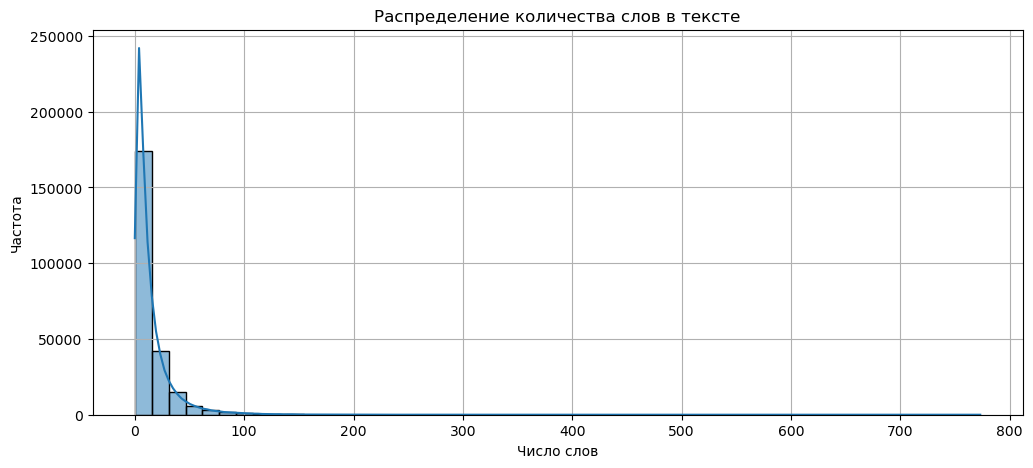

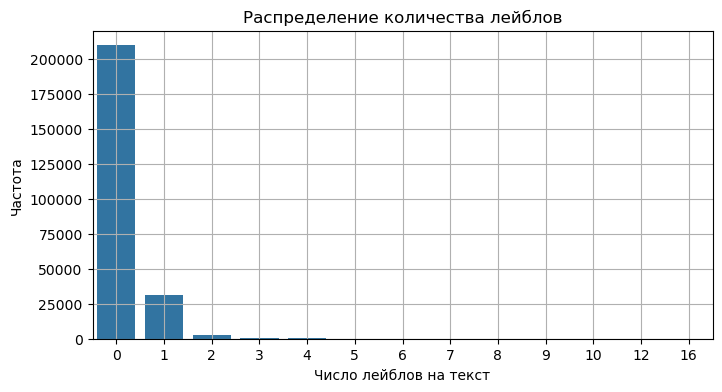

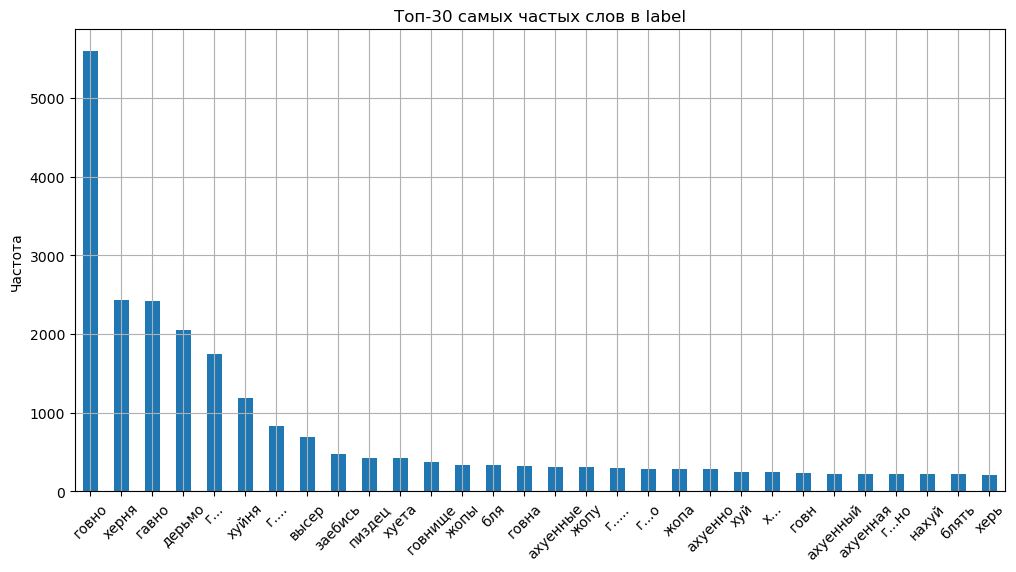

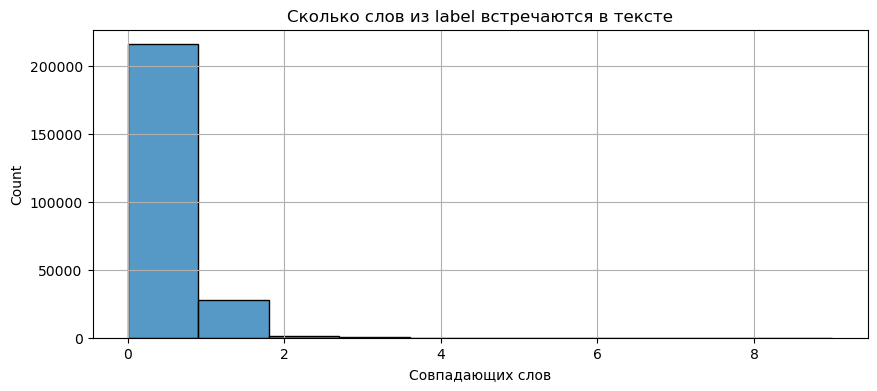

In [64]:
from collections import Counter

# === Загрузка данных ===
train = pd.read_csv("train.csv")

# === Заполнение NaN ===
train["label"] = train["label"].fillna("__no_label__")

# === Статистика по label ===
train["num_labels"] = train["label"].apply(lambda x: len(str(x).split(",")) if x != "__no_label__" else 0)

# === Очистка текста ===
def clean_text(text):
    text = re.sub(r"[^\w\s]", " ", str(text).lower())
    return re.sub(r"\s+", " ", text).strip()

train["text_clean"] = train["text"].apply(clean_text)
train["num_words"] = train["text_clean"].apply(lambda x: len(x.split()))
train["num_chars"] = train["text_clean"].apply(len)

# === Распределение длины текста ===
plt.figure(figsize=(12, 5))
sns.histplot(train["num_words"], bins=50, kde=True)
plt.title("Распределение количества слов в тексте")
plt.xlabel("Число слов")
plt.ylabel("Частота")
plt.grid(True)
plt.show()

# === Распределение количества лейблов ===
plt.figure(figsize=(8, 4))
sns.countplot(x="num_labels", data=train)
plt.title("Распределение количества лейблов")
plt.xlabel("Число лейблов на текст")
plt.ylabel("Частота")
plt.grid(True)
plt.show()

# === Топ-30 лейблов ===
all_labels = []
for entry in train["label"]:
    if entry != "__no_label__":
        all_labels.extend([w.strip() for w in entry.split(",")])
label_counts = pd.Series(all_labels).value_counts()

plt.figure(figsize=(12, 6))
label_counts.head(30).plot(kind="bar")
plt.title("Топ-30 самых частых слов в label")
plt.ylabel("Частота")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# === Сколько слов из label встречаются в тексте? ===
def label_overlap(row):
    text_words = set(row["text_clean"].split())
    labels = set(w.strip() for w in row["label"].split(",") if w != "__no_label__")
    return len(text_words & labels)

train["overlap_label_words"] = train.apply(label_overlap, axis=1)

plt.figure(figsize=(10, 4))
sns.histplot(train["overlap_label_words"], bins=10)
plt.title("Сколько слов из label встречаются в тексте")
plt.xlabel("Совпадающих слов")
plt.grid(True)
plt.show()


In [65]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer

# Загрузка данных
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train = train.dropna(subset=["label", "text"])
test = test.dropna(subset=["text"])

# === Предобработка текста ===
def clean_text(text):
    text = re.sub(r"[^\w\s]", " ", str(text).lower())
    text = re.sub(r"\s+", " ", text).strip()
    return text

train["text_clean"] = train["text"].apply(clean_text)
test["text_clean"] = test["text"].apply(clean_text)

# === Лейблы как списки ===
train["label_list"] = train["label"].apply(lambda x: [w.strip().lower() for w in str(x).split(",")])

# === Словарь меток ===
label_vocab = set()
for labels in train["label_list"]:
    label_vocab.update(labels)

# === Бинаризация лейблов ===
mlb = MultiLabelBinarizer()
y_bin = mlb.fit_transform(train["label_list"])

# === TF-IDF + логрег ===
model = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1, 2), max_features=20000)),
    ("clf", MultiOutputClassifier(LogisticRegression(solver='liblinear')))
])
model.fit(train["text_clean"], y_bin)

# === Keyword Matching на test ===
def keyword_match(text, vocab):
    tokens = re.findall(r'\w+', text.lower())
    matched = set([t for t in tokens if t in vocab])
    return list(matched)

test["km_labels"] = test["text_clean"].apply(lambda x: keyword_match(x, label_vocab))

# === ML-модель на test ===
ml_preds = model.predict(test["text_clean"])
ml_labels = mlb.inverse_transform(ml_preds)

# === Объединение ===
final_labels = []
for ml, km in zip(ml_labels, test["km_labels"]):
    merged = sorted(set(ml) | set(km))  # объединяем
    final_labels.append(",".join(merged))

# === Финальный submission ===
test["label"] = final_labels
test[["ID", "label"]].to_csv("submission.csv", index=False)


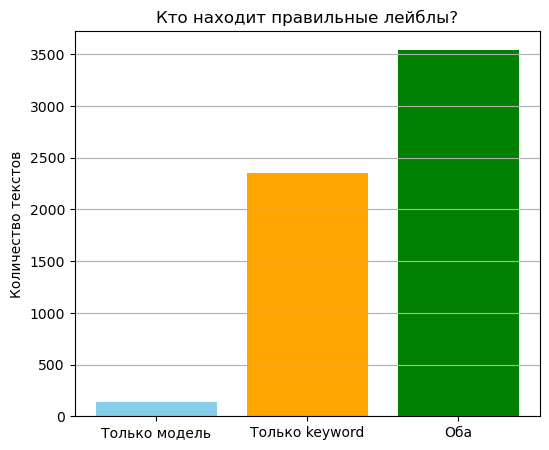

In [67]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Чистим train
train = train.dropna(subset=["text", "label"])
train["text_clean"] = train["text"].apply(clean_text)
train["label_list"] = train["label"].apply(lambda x: [w.strip().lower() for w in str(x).split(",")])

# Бинаризация
y_bin = mlb.fit_transform(train["label_list"])

# Разделим на подвыборку для анализа
X_sample, _, y_sample, _ = train_test_split(train["text_clean"], y_bin, test_size=0.8, random_state=42)
true_labels = mlb.inverse_transform(y_sample)

# Предсказание моделью
model_preds = model.predict(X_sample)
model_labels = mlb.inverse_transform(model_preds)

# Keyword match
keyword_labels = X_sample.apply(lambda x: keyword_match(x, label_vocab))

# Сравнение
only_model, only_keyword, both = 0, 0, 0

for km, ml, true in zip(keyword_labels, model_labels, true_labels):
    km_set, ml_set, true_set = set(km), set(ml), set(true)
    
    found_by_model = ml_set & true_set
    found_by_keyword = km_set & true_set

    if found_by_model and not found_by_keyword:
        only_model += 1
    elif found_by_keyword and not found_by_model:
        only_keyword += 1
    elif found_by_model and found_by_keyword:
        both += 1

# Визуализация
labels = ["Только модель", "Только keyword", "Оба"]
counts = [only_model, only_keyword, both]

plt.figure(figsize=(6, 5))
plt.bar(labels, counts, color=["skyblue", "orange", "green"])
plt.title("Кто находит правильные лейблы?")
plt.ylabel("Количество текстов")
plt.grid(axis="y")
plt.show()


In [70]:
import pandas as pd
import numpy as np
import re
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import Levenshtein
from sklearn.multiclass import OneVsRestClassifier

# === Загрузка данных ===
train = pd.read_csv("train.csv").dropna(subset=["label", "text"])
test = pd.read_csv("test.csv")

# === Предобработка ===
def clean_text(text):
    return re.sub(r"[^\w\s]", " ", str(text).lower()).strip()

train["text_clean"] = train["text"].apply(clean_text)
test["text_clean"] = test["text"].apply(clean_text)
train["label_list"] = train["label"].apply(lambda x: [w.strip().lower() for w in str(x).split(",")])

# === Словарь плохих слов ===
bad_words = set()
for labels in train["label_list"]:
    bad_words.update(labels)

# === Fuzzy Matching (расстояние ≤ 1) ===
def fuzzy_match(text, bad_words, max_dist=1):
    tokens = re.findall(r"\w+", text)
    matched = set()
    for token in tokens:
        for word in bad_words:
            if Levenshtein.distance(token, word) <= max_dist:
                matched.add(word)
    return matched

# === Keyword Matching ===
def keyword_match(text, bad_words):
    tokens = re.findall(r"\w+", text)
    return set([w for w in tokens if w in bad_words])

# === Объединение предсказаний ===
def combine_preds(keyword_set, fuzzy_set, model_set, mode="priority_keyword"):
    if mode == "priority_keyword":
        return sorted(set(keyword_set) | set(fuzzy_set) | (set(model_set) - set(keyword_set)))
    else:
        return sorted(set(model_set) | set(keyword_set) | set(fuzzy_set))

# === Модель ===
mlb = MultiLabelBinarizer()
y_bin = mlb.fit_transform(train["label_list"])

X_train, X_val, y_train, y_val = train_test_split(
    train["text_clean"], y_bin, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(analyzer='char_wb', ngram_range=(3, 5), max_features=20000)),
    ("clf", OneVsRestClassifier(LogisticRegression(C=1.0, solver='liblinear')))
])
pipeline.fit(X_train, y_train)

# === Предсказание на тесте ===
model_probs = pipeline.predict_proba(test["text_clean"])
model_preds = (model_probs > 0.3).astype(int)
model_labels = mlb.inverse_transform(model_preds)

# === Keyword + Fuzzy + Модель ===
final_labels = []
for i, row in test.iterrows():
    txt = row["text_clean"]
    kw = keyword_match(txt, bad_words)
    fuzzy = fuzzy_match(txt, bad_words)
    model = model_labels[i]
    final = combine_preds(kw, fuzzy, model, mode="priority_keyword")
    final_labels.append(",".join(final))

# === Сохранение submission.csv ===
submission = pd.DataFrame({
    "ID": test["ID"],
    "label": final_labels
})
submission.to_csv("submission.csv", index=False)


c:\Users\boris\anaconda3\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
c:\Users\boris\anaconda3\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 5 is present in all training examples.
  warnings.warn(
c:\Users\boris\anaconda3\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 6 is present in all training examples.
  warnings.warn(
c:\Users\boris\anaconda3\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 13 is present in all training examples.
  warnings.warn(
c:\Users\boris\anaconda3\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 27 is present in all training examples.
  warnings.warn(
c:\Users\boris\anaconda3\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 28 is present in all training examples.
  warnings.warn(
c:\Users\boris\anaconda3\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 33 is present in 

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModel
import torch
from catboost import CatBoostClassifier
from scipy.sparse import hstack


In [2]:
# Замените на свой путь
df_train = pd.read_csv("train.csv")  # Должны быть 'text' и 'label' колонки
df_train["text"] = df_train["text"].fillna("")


In [77]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
model = AutoModel.from_pretrained("DeepPavlov/rubert-base-cased").to(device)
model.eval()

def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=64)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    cls_embedding = outputs.last_hidden_state[:, 0, :]  # [CLS]
    return cls_embedding.cpu().numpy().flatten()

# Получаем эмбеддинги
X_rubert = np.array([get_bert_embedding(text) for text in tqdm(df_train["text"])])

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 244739/244739 [28:23<00:00, 143.66it/s]


In [ ]:
# Сохрним эмбеддинги
import os

# Сохраняем эмбеддинги после расчета
np.save("rubert_embeddings.npy", X_rubert)

In [3]:
# Если нужно загрузить потом:
X_rubert = np.load("rubert_embeddings.npy")

Feature-engineering

In [4]:
# TF-IDF фичи
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(3, 7))
X_tfidf = tfidf_vectorizer.fit_transform(df_train["text"])

KeyboardInterrupt: 

In [82]:
# Ручной
def make_text_features(text):
    text = str(text)
    return pd.Series({
        "length": len(text),
        "num_words": len(text.split()),
        "num_excl": text.count("!"),
        "num_question": text.count("?"),
        "num_upper": sum(1 for c in text if c.isupper()),
        "num_emojis": sum(1 for c in text if ord(c) > 10000),
        "has_mat": int(any(w in text.lower() for w in ["хер", "сука", "гавно", "говно", "дерьмо", "блять", "мразь"])),
    })

df_feats = df_train["text"].apply(make_text_features)
scaler = StandardScaler()
X_manual = scaler.fit_transform(df_feats)

In [5]:
# Объединяем фичи
# X_combined = np.hstack([X_rubert, X_tfidf.toarray(), X_manual])
y = df_train["label"]

In [6]:
# Делим на трейн и валидацию
X_train, X_val, y_train, y_val = train_test_split(X_rubert, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)

le.inverse_transform(model.predict(X_test))

ValueError: y contains previously unseen labels: 'ахуеннн'

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

ValueError: Input contains NaN

In [ ]:
# from sklearn.neural_network import MLPClassifier

# model = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=500)
# model.fit(X_train, y_train_enc)

In [ ]:
# model = CatBoostClassifier(
#     iterations=500,
#     learning_rate=0.05,
#     depth=6,
#     task_type="GPU",  # важный момент
#     devices='0',      # GPU номер 0
#     verbose=100
# )

# model.fit(X_train, y_train_enc, eval_set=(X_val, y_val_enc))

TypeError: must be real number, not str

In [ ]:
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_combined, y)):
    print(f"\n📂 Fold {fold + 1}")
    
    X_train, X_val = X_combined[train_idx], X_combined[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model = CatBoostClassifier(
        iterations=300,
        learning_rate=0.05,
        depth=6,
        task_type="GPU",
        devices='0',
        verbose=False
    )

    model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=False)
    preds = model.predict(X_val)
    score = f1_score(y_val, preds, average="macro")
    print(f"F1-macro: {score:.4f}")
    f1_scores.append(score)

print(f"\n🔥 Средний F1 (macro): {np.mean(f1_scores):.4f}")


In [ ]:
model.fit(X_combined, y)
importances = model.get_feature_importance()
feature_names = (
    [f"RuBERT_{i}" for i in range(X_rubert.shape[1])] +
    [f"TFIDF_{i}" for i in range(X_tfidf.shape[1])] +
    list(df_feats.columns)
)

# Топ-20 важных признаков
importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print(importance_df.head(20))


In [ ]:
import Levenshtein

def levenshtein_score(y_true, y_pred):
    distances = [Levenshtein.distance(str(t), str(p)) for t, p in zip(y_true, y_pred)]
    return np.mean(distances)

# Оцениваем на последней валидации:
lev_score = levenshtein_score(y_val, preds)
print(f"📐 Средняя дистанция Левенштейна: {lev_score:.2f}")


In [72]:
def tokenize(text):
    # Простая токенизация по пробелам и пунктуации
    return re.findall(r'\w+|[^\w\s]', text.lower())

def create_labels(text, target):
    tokens = tokenize(text)
    labels = ['O'] * len(tokens)
    
    if pd.isna(target) or not isinstance(target, str):
        return tokens, labels
    
    target_tokens = tokenize(target)
    for i in range(len(tokens) - len(target_tokens) + 1):
        if tokens[i:i+len(target_tokens)] == target_tokens:
            labels[i] = 'B-T'
            for j in range(1, len(target_tokens)):
                labels[i + j] = 'I-T'
            break
    return tokens, labels

# Загрузим df
df = pd.read_csv("train.csv")  # или подставь свой путь

# Разметка
tokenized_data = df.apply(lambda row: create_labels(row['text'], row['label']), axis=1)
df['tokens'] = tokenized_data.apply(lambda x: x[0])
df['labels'] = tokenized_data.apply(lambda x: x[1])


In [74]:
from transformers import AutoTokenizer, AutoModel
import torch

# Загружаем токенизатор и модель
tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
model = AutoModel.from_pretrained("DeepPavlov/rubert-base-cased")

# Функция для получения эмбеддинга
def get_rubert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    # Берём среднее по всем токенам
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()


Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
import pandas as pd
import re

# === 1. Загрузка текста ===
# Допустим, у тебя уже есть датафрейм:
df = pd.read_csv("train.csv")
# И в нём есть колонка "text" — она содержит пользовательские комментарии

test_df = pd.read_csv('test.csv')
# Для теста:
# df = pd.DataFrame({"text": ["Это говно полное, хуйня какая-то!", "Какое дерьмо, ужас просто!", "Нормально всё"]})

# === 2. Функция для извлечения слов (можно вручную составить словарь) ===
def build_bad_words_vocab(df, min_count=5):
    word_counter = {}
    for text in df['text'].dropna():
        words = re.findall(r'\b[\w\*\#@%ёЁ]+\b', text.lower())
        for w in words:
            word_counter[w] = word_counter.get(w, 0) + 1
    return set([w for w, c in word_counter.items() if c >= min_count and re.search(r'[а-яё]', w)])

# === 3. Построение регулярных выражений ===
def make_fuzzy_patterns(bad_words):
    patterns = []
    for word in bad_words:
        # Заменим гласные на шаблон — чтобы ловить вариации
        fuzzy = re.sub(r'[аоиеёэыуюяaeiouy]', '[аоиеёэыуюяaeiouy*@%#]*', word)
        patterns.append(re.compile(rf'\b{fuzzy}\b', flags=re.IGNORECASE))
    return patterns

# === 4. Функция извлечения мата ===
def extract_bad_words(text, patterns):
    text = text.lower()
    found = set()
    for pat in patterns:
        found.update(pat.findall(text))
    return " ".join(sorted(found))

# === 5. Применение ко всему датасету ===
def apply_bad_word_extraction(df, min_count=5):
    vocab = build_bad_words_vocab(df, min_count=min_count)
    patterns = make_fuzzy_patterns(vocab)
    df['extracted_bad_words'] = df['text'].apply(lambda x: extract_bad_words(x, patterns))
    return df


In [15]:
df['label'] = df['extracted_bad_words'].apply(lambda x: int(bool(x.strip())))


KeyError: 'extracted_bad_words'

In [16]:
import pandas as pd
import re

# Шаг 1: Загрузка данных
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")  # замените путь, если файл называется иначе

# Шаг 2: Построение словаря плохих слов из train_df["label"]
def build_bad_words_dict(df):
    labeled = df[df["label"].notna()]
    bad_words = (
        labeled["label"]
        .str.lower()
        .str.split(",")
        .explode()
        .str.strip()
        .value_counts()
    )
    return set(bad_words.index)

# Шаг 3: Функция для извлечения плохих слов из текста
def extract_bad_words(text, bad_words_set):
    if not isinstance(text, str):
        return ""
    tokens = re.findall(r'\b\w+\b', text.lower())
    found = {token for token in tokens if token in bad_words_set}
    return ",".join(sorted(found))

# Шаг 4: Построение словаря и применение к тестовому набору
bad_words_set = build_bad_words_dict(train_df)
test_df["label"] = test_df["text"].apply(lambda x: extract_bad_words(x, bad_words_set))

# Шаг 5: Сохранение submission
submission = test_df[["ID", "label"]]
submission.to_csv("submission.csv", index=False)
